### Taihua Li | CSC 478 | Homework 2 | 4/28/16

In [1]:
cd "/Users/TaihuaLi/Desktop/DePaul/CSC478 Programming Data Mining Apps/Homework/Homework 2/newsgroups"

/Users/TaihuaLi/Desktop/DePaul/CSC478 Programming Data Mining Apps/Homework/Homework 2/newsgroups


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#### 1.For this problem you will use a subset of the 20 Newsgroup data set. The full data set contains 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups and has been often used for experiments in text applications of machine learning techniques, such as text classification and text clustering (see the description of the full dataset). The assignment data set contains a subset of 1000 documents and a vocabulary of  terms. Each document belongs to one of two classes Hockey (class label 1) and Microsoft Windows (class label 0). The data has already been split (80%, 20%) into training and test data. The class labels for the training and test data are also provided in separate files. The training and test data contain a row for each term in the vocabulary and a column for each document. The values in the table represent raw term frequencies. The data has already been preprocessed to extract terms, remove stop words and perform stemming (so, the vocabulary contains stems not full terms). Please be sure to read the readme.txt file in the distribution.

##### a) Create your own KNN classifier. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K, and should return the predicted class for the instance and the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine Similarity (see class examples). You may create two separate classifiers, or add this capability as a parameter for the classifier function.

In [3]:
def KNN_Classifier(instance, dat, label, k, measure):
    if measure == "euclidean":
        dists = np.sqrt(((dat-instance)**2).sum(axis=1))
    elif measure == "cosine":
        dat_norm = np.array([np.linalg.norm(dat[j]) for j in range(len(dat))])
        instance_norm = np.linalg.norm(instance)
        sims = np.dot(dat, instance)/(dat_norm*instance_norm)
        dists = 1 - sims
    idx = np.argsort(dists)
    neighbor_index = idx[:k]
    neighbor_record = dat[[neighbor_index]]
    labels = label[[neighbor_index]]
    final_class = np.bincount(labels)
    return np.argmax(final_class), idx[:k]

##### b) Create a function to compute the classification accuracy over the test data set (ratio of correct predictions to the number of test instances). This function will call the classifier function on all the test instances and in each case compares the actual test class label to the predicted class label.

In [4]:
def Comp_Accuracy(testdata, testlabel, traindata, trainlabel, k, measure):
    correct = 0
    for i in range(testdata.shape[0]):
        pred_class = KNN_Classifier(testdata[i], traindata, trainlabel, k, measure)
        if pred_class[0] == testlabel[i,:][1]:
            correct += 1
    accuracy_rate = float(correct)/float(testdata.shape[0])
    return accuracy_rate

##### c) Run your accuracy function on a range of values for K in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. [For example, you can try evaluating your classifiers on a range of values of K from 1 through 20 and present the results as a table or a graph].

In [5]:
terms = np.genfromtxt("modifiedterms.txt", dtype=str)
TrainMatrix_TD = np.genfromtxt("trainMatrixModified.txt", delimiter="\t")
TrainMatrix_DT = TrainMatrix_TD.T
TrainClass = np.loadtxt("trainClasses.txt", delimiter="\t", dtype=int)
TestMatrix_TD = np.genfromtxt("testMatrixModified.txt", delimiter="\t")
TestMatrix_DT = TestMatrix_TD.T
TestClass = np.loadtxt("testClasses.txt", delimiter="\t", dtype=int)

Euclidean distance, k=(1, 20)

In [6]:
euc_accuracy = []
for i in range(1, 21):
    result = Comp_Accuracy(TestMatrix_DT, TestClass, TrainMatrix_DT, TrainClass[:,1], i, "euclidean")
    euc_accuracy.append(result)
print euc_accuracy

[0.78, 0.785, 0.81, 0.77, 0.815, 0.745, 0.765, 0.73, 0.75, 0.705, 0.795, 0.725, 0.775, 0.74, 0.785, 0.73, 0.76, 0.725, 0.74, 0.71]


cosine similarity, k=(1, 20)

In [7]:
cos_accuracy = []
for i in range(1, 21):
    result = Comp_Accuracy(TestMatrix_DT, TestClass, TrainMatrix_DT, TrainClass[:,1], i, "cosine")
    cos_accuracy.append(result)
print cos_accuracy

[0.985, 0.96, 0.97, 0.965, 0.97, 0.98, 0.98, 0.97, 0.975, 0.975, 0.98, 0.97, 0.98, 0.97, 0.985, 0.975, 0.975, 0.975, 0.975, 0.975]


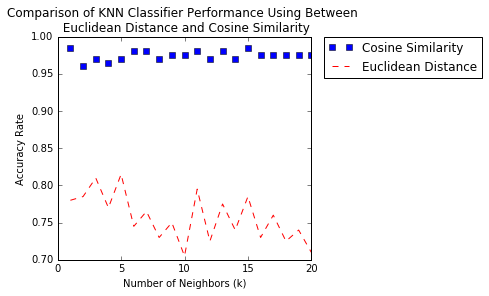

In [8]:
k = np.array(range(1, 21))
euc = np.array(euc_accuracy)
cos = np.array(cos_accuracy)
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Comparison of KNN Classifier Performance Using Between \n Euclidean Distance and Cosine Similarity")
ax1.set_xlabel('Number of Neighbors (k)')
ax1.set_ylabel('Accuracy Rate')
plt.plot(k, cos, 'bs', label='Cosine Similarity')
plt.plot(k, euc, 'r--', label='Euclidean Distance')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

##### d) Using Python, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). [See class notes on Text Categorization]. Then, rerun your evaluation on the range of K values (as above) and compare the results to the results without using TFxIDF weights.

In [9]:
numTerms = len(TrainMatrix_DT[0])
train_numDocs = TrainMatrix_DT.shape[0]
test_numDocs = TestMatrix_DT.shape[0]
print numTerms, train_numDocs, test_numDocs

5500 800 200


In [90]:
Doc_freq_train = np.array([(TrainMatrix_TD!=0).sum(1)]).T
TrainNMatrix = np.ones(np.shape(TrainMatrix_TD), dtype=float)*train_numDocs
TestNMatrix = np.ones(np.shape(TestMatrix_TD), dtype=float)*train_numDocs
train_IDF = np.log2(np.divide(TrainNMatrix, Doc_freq_train))
test_IDF = np.log2(np.divide(TestNMatrix, Doc_freq_train))
train_TFIDF = TrainMatrix_TD * train_IDF
test_TFIDF = TestMatrix_TD * test_IDF

In [12]:
NewTrainDT = train_TFIDF.T
NewTestDT = test_TFIDF.T

In [13]:
new_euc_accuracy = []
for i in range(1, 21):
    result = Comp_Accuracy(NewTestDT, TestClass, NewTrainDT, TrainClass[:,1], i, "euclidean")
    new_euc_accuracy.append(result)
print new_euc_accuracy

[0.71, 0.74, 0.75, 0.79, 0.8, 0.71, 0.73, 0.665, 0.68, 0.625, 0.68, 0.63, 0.65, 0.6, 0.62, 0.575, 0.615, 0.585, 0.63, 0.59]


In [15]:
new_cos_accuracy = []
for i in range(1, 21):
    result = Comp_Accuracy(NewTestDT, TestClass, NewTrainDT, TrainClass[:,1], i, "cosine")
    new_cos_accuracy.append(result)
print new_cos_accuracy

[0.945, 0.955, 0.98, 0.97, 0.98, 0.98, 0.985, 0.99, 0.99, 0.995, 0.99, 0.99, 0.99, 0.99, 0.99, 0.995, 0.99, 0.99, 0.995, 0.995]


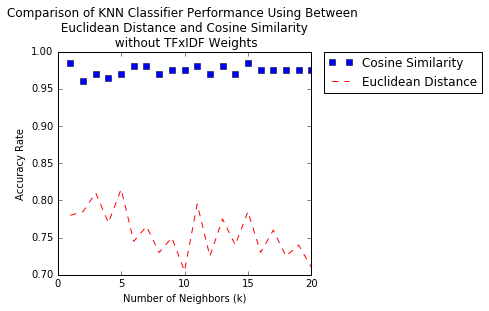

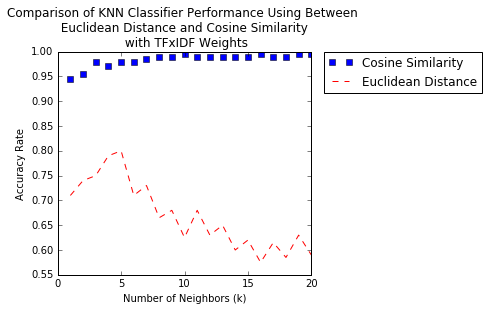

In [16]:
new_euc = np.array(new_euc_accuracy)
new_cos = np.array(new_cos_accuracy)
fig = plt.figure(figsize=(10,4))
ax2 = fig.add_subplot(121)
ax2.set_title("Comparison of KNN Classifier Performance Using Between \n Euclidean Distance and Cosine Similarity \n without TFxIDF Weights")
ax2.set_xlabel('Number of Neighbors (k)')
ax2.set_ylabel('Accuracy Rate')
plt.plot(k, cos, 'bs', label='Cosine Similarity')
plt.plot(k, euc, 'r--', label='Euclidean Distance')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Comparison of KNN Classifier Performance Using Between \n Euclidean Distance and Cosine Similarity \n with TFxIDF Weights")
ax1.set_xlabel('Number of Neighbors (k)')
ax1.set_ylabel('Accuracy Rate')
plt.plot(k, new_cos, 'bs', label='Cosine Similarity')
plt.plot(k, new_euc, 'r--', label='Euclidean Distance')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

As shown above, the accuracies from measures between cosine similarity and euclidean distance deviate significantly in the first graph, which is a result of using the raw count data for the KNN classifier. In the second graph, with TFxIDF data, the accuracies of both measures still differ significantly. However, the accuracies for cosine similarity improves a lot. When K=10, the accuracy of using cosine similarity reaches 0.995 and as k increases, the accuracy fluctuates between 0.99 and 0.995. For the euclidean distance measure, the accuracy in general is actually worse than previously. When K=5, the accuracy of using euclidean distance measurement is 0.8, which is the highest among all the k values tested.

##### e) Create a classifier based on the Rocchio Method adapted for text categorization. Your classifier should take as input the training data matrix, the training labels, and the instance to be classified. It should compute the prototype vectors for each of the categories and measure Cosine similarity of the test instance to each prototype. Your output should indicate the predicted class and include the similarity values of the instance to each of the category prototypes. Finally, compute the classification accuracy using the test instances and compare your results to the best KNN approach you tried earlier.

In [17]:
def Rocchio_Classifier(training, labels, instance):
    x = np.column_stack((training, labels.T))
    # prototypes for each class
    class_one = np.array(np.zeros(training.shape[1]+1))
    class_zero = np.array(np.zeros(training.shape[1]+1))
    NumOnes = 0
    NumZeros = 0
    for i in x:
        if i[-1] == 1:
            class_one += i
            NumOnes += 1
        else:
            class_zero += i
            NumZeros += 1
    # cosine similarity between prototypes & instance
    class_one_norm = np.linalg.norm(class_one)
    class_zero_norm = np.linalg.norm(class_zero)
    instance_norm = np.linalg.norm(instance)
    cos_sims_one = np.dot(class_one[:len(class_one)-1], instance)/(class_one_norm*instance_norm)
    cos_sims_zero = np.dot(class_zero[:len(class_zero)-1], instance)/(class_zero_norm*instance_norm)
    if cos_sims_one >= cos_sims_zero:
        return 1, cos_sims_one, cos_sims_zero
    else:
        return 0, cos_sims_one, cos_sims_zero

def Rocchio_Accuracy(training, trainlabel, testing, testlabel):
    correct = 0
    for i in range(testing.shape[0]):
        pred_class = Rocchio_Classifier(training, trainlabel, testing[i])
        if pred_class[0] == testlabel[i,:][1]:
            correct += 1
    accuracy_rate = float(correct)/float(testing.shape[0])
    print "The accuracy rate is %f." % accuracy_rate

In [18]:
Rocchio_Accuracy(NewTrainDT, TrainClass[:,1], NewTestDT, TestClass)

The accuracy rate is 0.980000.


Comparing the accuracy of the Rocchio method with K-Nearest Neighbor algorithm on the TFxIDF data, overall, the KNN algorithm with cosine similarity measure outputs better accuracies as its higest accuracy is 0.995.

#### 2. For this problem you will experiment with various classifiers provided as part of the scikit-learn (sklearn) machine learning module, as well as with some of its preprocessing and model evaluation capabilities.  [Note: This module is already part of the Anaconda distributions. However, if you are using standalone Python distributions, you will need to first obtain and install it]. You will work with a modified subset of a real data set of customers for a bank. This is the same data set used in Assignment 1. The data is provided in a CSV formatted file with the first row containing the attribute names. The description of the the different fields in the data are provided in this document.

#### Your tasks in this problem are the following:

##### a) Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikit-learn. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. You will need to convert the selected dataset into the Standard Spreadsheet format (scikit-learn functions generally assume that all attributes are in numeric form). Finally, you need to split the transformed data into training and test sets (using 80%-20% randomized split). [Review Ipython Notebook examples from Week 4 for different ways to perform these tasks.]

In [19]:
cd "/Users/TaihuaLi/Desktop/DePaul/CSC478 Programming Data Mining Apps/Homework/Homework 2"

/Users/TaihuaLi/Desktop/DePaul/CSC478 Programming Data Mining Apps/Homework/Homework 2


In [20]:
from sklearn.feature_extraction import DictVectorizer
from sklearn import neighbors, tree, naive_bayes
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [21]:
dat = pd.read_csv("bank_data.csv", sep=',', index_col=0, header=0)

In [22]:
dat.head(5)

age   income  children  gender      region married  car savings_acct  \
id                                                                              
ID12101   48  17546.0         1  FEMALE  INNER_CITY      NO   NO           NO   
ID12102   40  30085.1         3    MALE        TOWN     YES  YES           NO   
ID12103   51  16575.4         0  FEMALE  INNER_CITY     YES  YES          YES   
ID12104   23  20375.4         3  FEMALE        TOWN     YES   NO           NO   
ID12105   57  50576.3         0  FEMALE       RURAL     YES   NO          YES   

        current_acct mortgage  pep  
id                                  
ID12101           NO       NO  YES  
ID12102          YES      YES   NO  
ID12103          YES       NO   NO  
ID12104          YES       NO   NO  
ID12105           NO       NO   NO

In [23]:
labels = dat['pep']

In [24]:
dat = dat.drop('pep', axis=1)

In [25]:
dat = pd.get_dummies(dat)

In [26]:
dat = np.array(dat)
labels = np.array(labels)

In [27]:
dat_train, dat_test, dat_target_train, dat_target_test = train_test_split(dat, labels, test_size=0.2, random_state=33)

In [28]:
print dat_train.shape, dat_test.shape

(480, 19) (120, 19)


##### b) Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you must first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Also, computing the average accuracy score. Experiment with different values of K and the weight parameter for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion what parameters worked best).

In [29]:
min_max_scaler = preprocessing.MinMaxScaler().fit(dat_train)
dat_train_norm = min_max_scaler.transform(dat_train)
dat_test_norm = min_max_scaler.transform(dat_test)

In [30]:
n_neighbors = 17
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
knnclf.fit(dat_train_norm, dat_target_train)
knnpreds_test = knnclf.predict(dat_test_norm)
knncm = confusion_matrix(dat_target_test, knnpreds_test)
knn_train_score = knnclf.score(dat_train_norm, dat_target_train)
knn_test_score = knnclf.score(dat_test_norm, dat_target_test)
print classification_report(dat_target_test, knnpreds_test),
print "\n Confusion Matrix \n",knncm, "\n"
print "Average accuracy is", (knn_train_score+knn_test_score)/2
print "Training score is %f" % knn_train_score
print "Testing score is %f" % knn_test_score

             precision    recall  f1-score   support

         NO       0.70      0.80      0.75        66
        YES       0.70      0.57      0.63        54

avg / total       0.70      0.70      0.70       120

 Confusion Matrix 
[[53 13]
 [23 31]] 

Average accuracy is 0.70625
Training score is 0.712500
Testing score is 0.700000


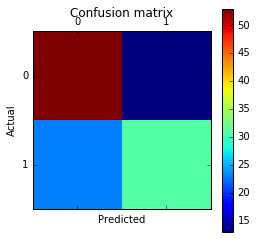

In [31]:
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

As shown above, from experiments with k between 1 and 20 and with weights parameters between "distance" and "uniform", the accuracy is the highest when k=17 with the weights parameter is "uniform". As shown above, the accuracy of the algorithm is 0.7.

##### c) Repeat the classification using scikit-learn's decision tree classifier (using the default parameters) and the naive Bayes (Gaussian) classifier. As above, generate the confusion matrix, classification report, and average accuracy score for each classifier. For each model, compare the average accuracry scores on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off?

Decision Tree

In [32]:
treeclf = tree.DecisionTreeClassifier()
treeclf = treeclf.fit(dat_train, dat_target_train)
treepreds_test = treeclf.predict(dat_test)
treecm = confusion_matrix(dat_target_test, treepreds_test)
tree_train_score = treeclf.score(dat_train, dat_target_train)
tree_test_score = treeclf.score(dat_test, dat_target_test)
print classification_report(dat_target_test, treepreds_test) 
print "\n Confusion Matrix \n", treecm, "\n"
print "Average accuracy is", (tree_train_score+tree_test_score)/2
print "Training score is %f" % tree_train_score
print "Testing score is %f" % tree_test_score

             precision    recall  f1-score   support

         NO       0.84      0.86      0.85        66
        YES       0.83      0.80      0.81        54

avg / total       0.83      0.83      0.83       120


 Confusion Matrix 
[[57  9]
 [11 43]] 

Average accuracy is 0.916666666667
Training score is 1.000000
Testing score is 0.833333


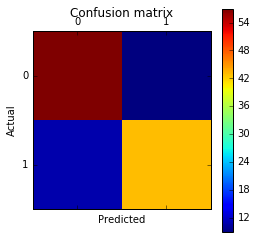

In [33]:
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Naive Bayes

In [34]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(dat_train, dat_target_train)
nbpreds_test = nbclf.predict(dat_test)
nbcm = confusion_matrix(dat_target_test, nbpreds_test)
nb_train_score = nbclf.score(dat_train, dat_target_train)
nb_test_score = nbclf.score(dat_test, dat_target_test)
print classification_report(dat_target_test, nbpreds_test) 
print "\n Confusion Matrix \n", nbcm, "\n"
print "Average accuracy is",  (nb_train_score+nb_test_score)/2
print "Training score is %f" % nb_train_score
print "Testing score is %f" % nb_test_score

             precision    recall  f1-score   support

         NO       0.60      0.74      0.67        66
        YES       0.56      0.41      0.47        54

avg / total       0.59      0.59      0.58       120


 Confusion Matrix 
[[49 17]
 [32 22]] 

Average accuracy is 0.623958333333
Training score is 0.656250
Testing score is 0.591667


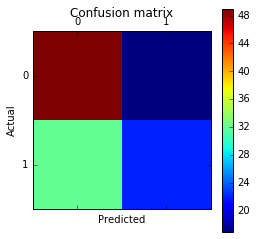

In [35]:
plt.matshow(nbcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##### d) Discuss your observations based on the above experiments.

As shown above, the decision tree classifier produces the highest accuracy among the three classifiers. However, the difference between the decision tree score on training and testing data set is 0.2, which is greater than 0.1, it indicates an overfitted model. Therefore, we can only compare between the KNN and Naive Bayes classifiers. 
Between these two classifiers, KNN classifier has a higher accuracy rate of 0.7. Also the difference of KNN classifier scores between training and testing data set is a lot smaller than that from the Naive Bayes classifiers. Therefore, for this data set, K-nearest neighbor classifier is the best algorithm.

#### 3. For this problem you will use a simplified version of the Adult Census Data Set. In the subset provided here, some of the attributes have been removed and some preprocessing has been performed.
#### Your tasks in this problem are the following:

##### a) Preprocessing and data analysis:
 ##### -Examine the data for missing values. In case of categorical attributes, remove instances with missing values. In the case of numeric attributes, impute and fill-in the missing values using the attribute mean.
    
 ##### -Examine the characteristics of the attributes, including relevant statistics for each attribute, histograms illustrating the distribtions of numeric attributes, bar graphs showing value counts for categorical attributes, etc.
    
 ##### -Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. Discuss your observations from this analysis.
 ##### -Compare and contrast the characteristics of the low-income and high-income categories across the different attributes. 

In [36]:
cs_dat = pd.read_csv("adult-modified.csv", sep=',', header=0, na_values=["?"])

In [37]:
cs_dat.head(5)

age workclass  education marital-status   race     sex  hours-per-week  \
0   39    Public         13         Single  White    Male              40   
1   50  Self-emp         13        Married  White    Male              13   
2   38   Private          9         Single  White    Male              40   
3   53   Private          7        Married  Black    Male              40   
4   28   Private         13        Married  Black  Female              40   

  income  
0  <=50K  
1  <=50K  
2  <=50K  
3  <=50K  
4  <=50K

In [38]:
cs_dat.describe(include="all")

age workclass     education marital-status   race    sex  \
count   9802.000000      9412  10000.000000          10000  10000  10000   
unique          NaN         3           NaN              2      5      2   
top             NaN   Private           NaN         Single  White   Male   
freq            NaN      6947           NaN           5017   8556   6703   
mean      38.449806       NaN     10.076600            NaN    NaN    NaN   
std       13.611949       NaN      2.548172            NaN    NaN    NaN   
min       17.000000       NaN      1.000000            NaN    NaN    NaN   
25%       27.000000       NaN      9.000000            NaN    NaN    NaN   
50%       37.000000       NaN     10.000000            NaN    NaN    NaN   
75%       47.000000       NaN     12.000000            NaN    NaN    NaN   
max       90.000000       NaN     16.000000            NaN    NaN    NaN   

        hours-per-week income  
count     10000.000000  10000  
unique             NaN      2  
top                NaN  <=50K  
freq               NaN   7621  
mean         40.530300    NaN  
std          12.277197    NaN  
min           1.000000    NaN  
25%          40.000000    NaN  
50%          40.000000    NaN  
75%          45.000000    NaN  
max          99.000000    NaN

In [39]:
cs_dat[cs_dat.age.isnull()]

age workclass  education marital-status         race     sex  \
19    NaN  Self-emp         14         Single        White  Female   
27    NaN       NaN         10        Married        Asian    Male   
40    NaN   Private          5        Married        White    Male   
65    NaN   Private          9        Married        White    Male   
80    NaN   Private          9         Single        White    Male   
89    NaN    Public         16         Single        White  Female   
95    NaN    Public         10         Single        White    Male   
113   NaN   Private         10        Married        White  Female   
132   NaN  Self-emp          9        Married        White    Male   
147   NaN   Private          9        Married        White  Female   
159   NaN   Private         13         Single        Black    Male   
180   NaN    Public         10        Married        Black    Male   
192   NaN    Public         13        Married        Black    Male   
210   NaN    Public          9        Married        Black    Male   
234   NaN   Private         15         Single        White    Male   
255   NaN  Self-emp          9        Married        Asian    Male   
273   NaN    Public         14         Single        White    Male   
294   NaN   Private         13         Single        Black  Female   
300   NaN   Private         13        Married        White    Male   
301   NaN   Private         10         Single        Asian  Female   
319   NaN   Private          9        Married        White  Female   
499   NaN       NaN          9        Married        White    Male   
520   NaN  Self-emp         13        Married        White    Male   
592   NaN   Private          4         Single        White    Male   
625   NaN   Private          9         Single        Black    Male   
661   NaN   Private         14         Single        White    Male   
697   NaN   Private         14        Married        White    Male   
940   NaN   Private         12         Single  Amer-Indian  Female   
961   NaN   Private          9         Single        White  Female   
979   NaN   Private          9         Single        White    Male   
...   ...       ...        ...            ...          ...     ...   
8289  NaN  Self-emp          9        Married        White    Male   
8315  NaN   Private         10         Single        White    Male   
8399  NaN   Private          9         Single        White    Male   
8406  NaN    Public         10         Single        White  Female   
8517  NaN   Private          9         Single        White    Male   
8540  NaN    Public          9        Married        White    Male   
8621  NaN   Private         10        Married        White    Male   
8660  NaN  Self-emp          9        Married        White    Male   
8687  NaN   Private         13         Single        White  Female   
8774  NaN   Private          9        Married        White    Male   
8876  NaN  Self-emp          9         Single        White    Male   
8954  NaN       NaN         11        Married        White    Male   
8957  NaN  Self-emp         10        Married        White    Male   
8992  NaN   Private         10         Single        Asian    Male   
9001  NaN  Self-emp          9         Single        White    Male   
9025  NaN   Private          7        Married        White    Male   
9049  NaN   Private          9         Single        Black  Female   
9097  NaN    Public         14         Single        White  Female   
9164  NaN   Private         13        Married        White    Male   
9201  NaN   Private         13        Married        White  Female   
9228  NaN   Private         13        Married        White    Male   
9288  NaN    Public          9        Married        White    Male   
9465  NaN   Private          9        Married        White    Male   
9472  NaN   Private         10         Single        White    Male   
9936  NaN  Self-emp          9        Married        White    Male   
9944  NaN   Priv

In [40]:
cs_dat[cs_dat.workclass.isnull()]

age workclass  education marital-status         race     sex  \
27    NaN       NaN         10        Married        Asian    Male   
61     32       NaN          4        Married        White    Male   
69     25       NaN         10         Single        White    Male   
77     67       NaN          6        Married        White    Male   
106    17       NaN          6         Single        White  Female   
128    35       NaN          9        Married        White    Male   
149    43       NaN         10         Single        White  Female   
154    52       NaN          9         Single        White    Male   
160    68       NaN          2         Single        White  Female   
187    53       NaN         13         Single        White  Female   
201    19       NaN          9         Single        White    Male   
221    64       NaN          2         Single        White    Male   
226    60       NaN          6         Single  Amer-Indian  Female   
243    20       NaN         10         Single        White    Male   
266    19       NaN         10         Single        White    Male   
297    39       NaN         14        Married        Asian  Female   
312    19       NaN         10         Single        Black  Female   
326    23       NaN         11         Single        Black  Female   
346    67       NaN          7        Married        White    Male   
347    30       NaN         11         Single        White  Female   
354    59       NaN         13        Married        White    Male   
397    20       NaN          9         Single        White  Female   
408    28       NaN         10        Married        White  Female   
430    80       NaN          9        Married        White    Male   
431    17       NaN          7         Single        White    Male   
449    17       NaN          7         Single        White  Female   
459    32       NaN         10        Married        White    Male   
471    22       NaN         10         Single        White    Male   
484    52       NaN          8         Single        Black    Male   
486    63       NaN          2        Married        White    Male   
...   ...       ...        ...            ...          ...     ...   
9358   18       NaN          9         Single        White  Female   
9367   17       NaN          6         Single        White    Male   
9409   22       NaN         10         Single        White    Male   
9452   19       NaN         10         Single        White  Female   
9477   19       NaN         10         Single        White  Female   
9484   48       NaN          9        Married        White    Male   
9490   18       NaN         10         Single        White  Female   
9500   27       NaN          9        Married        White  Female   
9531   65       NaN          9        Married        White    Male   
9536   52       NaN         10        Married        White    Male   
9549   69       NaN         13        Married        White    Male   
9557   38       NaN          6         Single        White    Male   
9577   35       NaN          9        Married        White  Female   
9582   48       NaN         13        Married        White    Male   
9616   32       NaN          9        Married        White    Male   
9626   52       NaN         15        Married        Asian  Female   
9650   69       NaN         13        Married        White    Male   
9703   55       NaN         14        Married        White    Male   
9708   19       NaN          9         Single        White  Female   
9712   30       NaN          7         Single        White    Male   
9778   67       NaN          5        Married        White    Male   
9787   49       NaN         10         Single        White    Male   
9860   20       NaN         10         Single        Asian  Female   
9872   63       NaN          9        Married        Black  Female   
9885   68       NaN          9        Married        White    Male   
9907   68       

In [41]:
cs_dat[cs_dat.education.isnull()]

Empty DataFrame
Columns: [age, workclass, education, marital-status, race, sex, hours-per-week, income]
Index: []

In [42]:
cs_dat[cs_dat["marital-status"].isnull()]

Empty DataFrame
Columns: [age, workclass, education, marital-status, race, sex, hours-per-week, income]
Index: []

In [43]:
cs_dat[cs_dat.race.isnull()]

Empty DataFrame
Columns: [age, workclass, education, marital-status, race, sex, hours-per-week, income]
Index: []

In [44]:
cs_dat[cs_dat.sex.isnull()]

Empty DataFrame
Columns: [age, workclass, education, marital-status, race, sex, hours-per-week, income]
Index: []

In [45]:
cs_dat[cs_dat["hours-per-week"].isnull()]

Empty DataFrame
Columns: [age, workclass, education, marital-status, race, sex, hours-per-week, income]
Index: []

In [46]:
cs_dat[cs_dat.income.isnull()]

Empty DataFrame
Columns: [age, workclass, education, marital-status, race, sex, hours-per-week, income]
Index: []

As shown above, age has 198 missing values and workclass has 588 missing values. We need to fill in missing values for age with its column mean and remove all the instances where workclass is missing.

In [47]:
age_mean = cs_dat.age.mean()

In [48]:
cs_dat.age.fillna(age_mean, axis=0, inplace=True)

In [49]:
cs_dat[cs_dat.age.isnull()]

Empty DataFrame
Columns: [age, workclass, education, marital-status, race, sex, hours-per-week, income]
Index: []

All the missing values for age attribute have been filled.

In [50]:
cs_dat.dropna(axis=0, inplace=True)

In [51]:
cs_dat[cs_dat.workclass.isnull()]

Empty DataFrame
Columns: [age, workclass, education, marital-status, race, sex, hours-per-week, income]
Index: []

All the instances where workclass attribute is missing have been removed.

In [52]:
cs_dat.describe(include="all")

age workclass    education marital-status   race   sex  \
count   9412.000000      9412  9412.000000           9412   9412  9412   
unique          NaN         3          NaN              2      5     2   
top             NaN   Private          NaN        Married  White  Male   
freq            NaN      6947          NaN           4737   8062  6383   
mean      38.366342       NaN    10.125266            NaN    NaN   NaN   
std       12.962039       NaN     2.542118            NaN    NaN   NaN   
min       17.000000       NaN     1.000000            NaN    NaN   NaN   
25%       28.000000       NaN     9.000000            NaN    NaN   NaN   
50%       37.000000       NaN    10.000000            NaN    NaN   NaN   
75%       47.000000       NaN    13.000000            NaN    NaN   NaN   
max       90.000000       NaN    16.000000            NaN    NaN   NaN   

        hours-per-week income  
count      9412.000000   9412  
unique             NaN      2  
top                NaN  <=50K  
freq               NaN   7093  
mean         41.080217    NaN  
std          11.884590    NaN  
min           1.000000    NaN  
25%          40.000000    NaN  
50%          40.000000    NaN  
75%          45.000000    NaN  
max          99.000000    NaN

Below are some visualizations showing the distribution of all variables

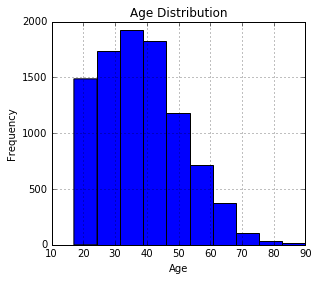

In [53]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Age Distribution")
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
cs_dat.age.plot(kind='hist', grid=True)

A shown above, the distribution of age is skewed to the right. For the age attribute, the mean is 38 years old and the median is 37 years old while the attribute ranges from 17 to 90 years old.

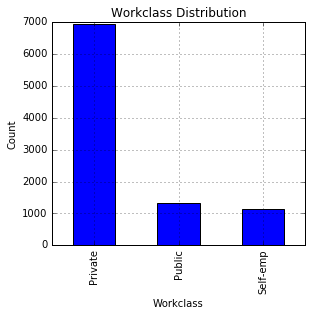

In [54]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Workclass Distribution")
ax1.set_xlabel('Workclass')
ax1.set_ylabel('Count')
cs_dat.workclass.value_counts().plot(kind='bar', grid=True)

For the workclass attribute, we have mostly private work class, which takes up 6974 out of 9412 instances.

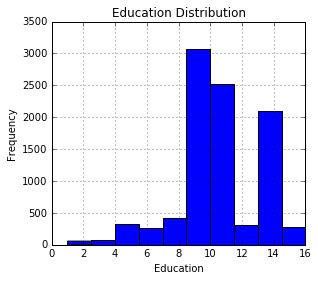

In [55]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Education Distribution")
ax1.set_xlabel('Education')
ax1.set_ylabel('Frequency')
cs_dat.education.plot(kind='hist', grid=True)

For the years of education attribute, most of the instances are between 8 and 12 years and the distribution of the data is skewed to the left. The mean value is 10 years of education, and the median value is 10 years while the attribute data ranges from 1 to 16 years.

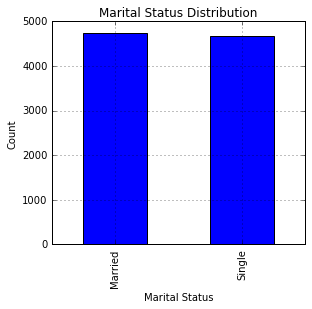

In [56]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Marital Status Distribution")
ax1.set_xlabel('Marital Status')
ax1.set_ylabel('Count')
cs_dat['marital-status'].value_counts().plot(kind='bar', grid=True)

For the marital status, the distribution between married and single is almost even with the number of married status being slightly greater than the single status. The married status has 4737 instances.

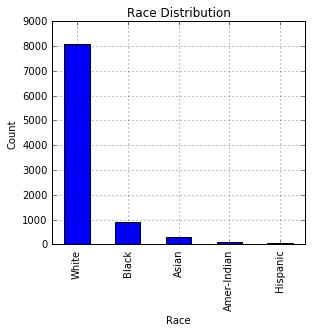

In [57]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Race Distribution")
ax1.set_xlabel('Race')
ax1.set_ylabel('Count')
cs_dat.race.value_counts().plot(kind='bar', grid=True)

As shown above, most of the instances' race is White, which has 8062 instances.

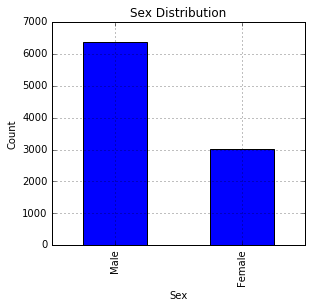

In [58]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Sex Distribution")
ax1.set_xlabel('Sex')
ax1.set_ylabel('Count')
cs_dat.sex.value_counts().plot(kind='bar', grid=True)

As shown above, the data set has 6383 male and 3092 female. 

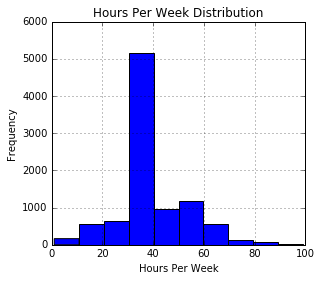

In [59]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Hours Per Week Distribution")
ax1.set_xlabel('Hours Per Week')
ax1.set_ylabel('Frequency')
cs_dat['hours-per-week'].plot(kind='hist', grid=True)

As shown above, most of instances have a working hour per week between 30 and 40 hours. The mean of the attribute is 41 hours and the median is 40 hours with the attribute values range between 1 and 99 hours.

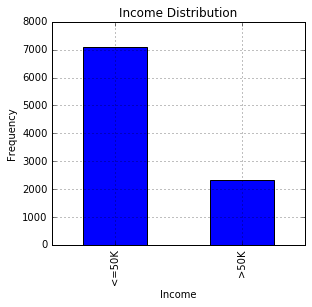

In [60]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Income Distribution")
ax1.set_xlabel('Income')
ax1.set_ylabel('Frequency')
cs_dat.income.value_counts().plot(kind='bar', grid=True)

As shown above, most of the instances' income is less or equal to 50K, which has a total of 7093 counts. 

Below are the cross tabulation results and their corresponding bar charts.

In [61]:
ct1 = pd.crosstab(cs_dat.education, cs_dat.race)
ct1

race       Amer-Indian  Asian  Black  Hispanic  White
education                                            
1                    0      0      1         0     11
2                    0      1      4         3     38
3                    0      4      5         1     71
4                    5      5     14         6    150
5                    0      3     19         2    118
6                    8      3     30         4    223
7                    4      6     49         4    261
8                    0      2     17         3     78
9                   35     67    350        23   2590
10                  26     64    206        11   1818
11                   5     10     33         4    337
12                   4      5     33         3    259
13                   5     75    102         8   1387
14                   0     27     20         1    467
15                   0     11      5         2    153
16                   0      8      4         0    101

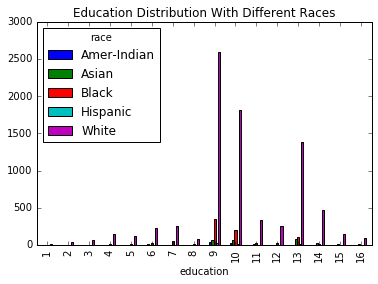

In [62]:
plt.show(ct1.plot(kind = "bar", title = "Education Distribution With Different Races"))

As shown above, in general for each race, most of observations' years of education fall into 9 years as this bin has the most values in all the graphs above. However, for Asian, about 75 instances have 13 years of education, which is the mode in the data set. For Black, Hispanic and White, they all have a mode of 9 years of education, followed by 10 years of education as the second most popular value and 13 years as the third most popular value. For American Indian, the mode value is 9 years, followed by 1o years as the second most popular value and 6 years as the third most popular value.

In [63]:
ct2 = pd.crosstab(cs_dat.workclass, cs_dat.income)
ct2

income     <=50K  >50K
workclass             
Private     5443  1504
Public       925   392
Self-emp     725   423

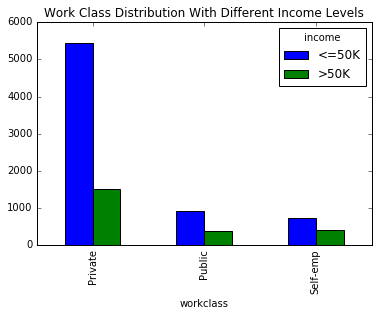

In [64]:
plt.show(ct2.plot(kind = "bar", title = "Work Class Distribution With Different Income Levels"))

As shown above, in the lower-income class, most of the people are private working class. In the higher income class, where the income is greater than 50K, most of the people are private working class as well. However, in the lower income class, the second most popular working class is public while in the higher income class, the second most popular working class is self employed.

In [65]:
ct3 = pd.crosstab(cs_dat.race, cs_dat.workclass)
ct3

workclass    Private  Public  Self-emp
race                                  
Amer-Indian       65      20         7
Asian            204      48        39
Black            664     192        36
Hispanic          64       5         6
White           5950    1052      1060

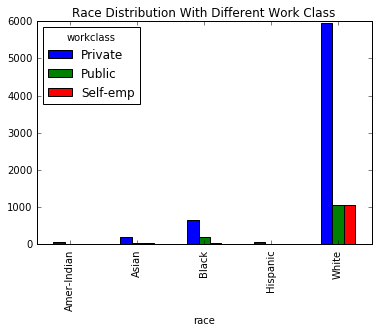

In [66]:
plt.show(ct3.plot(kind = "bar", title = "Race Distribution With Different Work Class"))

As shown above, for each working class, White is the dominating race for all since most of the instances in the data set are White. However, most of the White race have private work class. For private and public working classes, the second most popular race is Black, followed by Asian to be the third. For self-employed working class, Asian is the second most popular race while Black is the third most popular class.

In [67]:
ct4 = pd.crosstab(cs_dat.race, cs_dat.income)
ct4

income       <=50K  >50K
race                    
Amer-Indian     83     9
Asian          224    67
Black          773   119
Hispanic        69     6
White         5944  2118

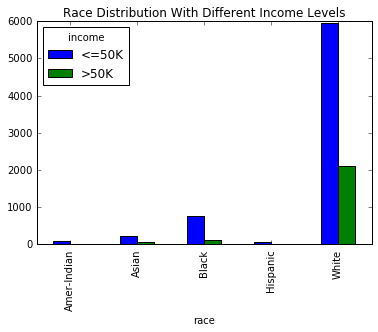

In [68]:
plt.show(ct4.plot(kind = "bar", title = "Race Distribution With Different Income Levels"))

In [69]:
pd.crosstab(cs_dat.race, cs_dat.income).apply(lambda r: r/r.sum(), axis=1)

income          <=50K      >50K
race                           
Amer-Indian  0.902174  0.097826
Asian        0.769759  0.230241
Black        0.866592  0.133408
Hispanic     0.920000  0.080000
White        0.737286  0.262714

As shown above in the graphs and the table indicating percentages of each race in either lower or upper income class, all the races have more percentage points in the lower income class than the higher income class. However, Hispanic and American Indian have over 90% of instances in the lower income class. Asian have almost a quarter of instances (23%) in the upper income class while White have slightly over a quarter of instances (26.27%) in the upper income class. For black, about 13.34% of instances are in the upper income class.

The following is a comparison between higher and lower income classes

In [70]:
lower_income = cs_dat[cs_dat.income=="<=50K"]
higher_income = cs_dat[cs_dat.income==">50K"]

In [71]:
lower_income.describe(include="all")

age workclass    education marital-status   race   sex  \
count   7093.000000      7093  7093.000000           7093   7093  7093   
unique          NaN         3          NaN              2      5     2   
top             NaN   Private          NaN         Single  White  Male   
freq            NaN      5443          NaN           4363   5944  4424   
mean      36.644604       NaN     9.646976            NaN    NaN   NaN   
std       13.340142       NaN     2.397358            NaN    NaN   NaN   
min       17.000000       NaN     1.000000            NaN    NaN   NaN   
25%       26.000000       NaN     9.000000            NaN    NaN   NaN   
50%       35.000000       NaN     9.000000            NaN    NaN   NaN   
75%       45.000000       NaN    10.000000            NaN    NaN   NaN   
max       90.000000       NaN    16.000000            NaN    NaN   NaN   

        hours-per-week income  
count      7093.000000   7093  
unique             NaN      1  
top                NaN  <=50K  
freq               NaN   7093  
mean         39.567038    NaN  
std          11.868506    NaN  
min           1.000000    NaN  
25%          38.000000    NaN  
50%          40.000000    NaN  
75%          40.000000    NaN  
max          99.000000    NaN

In [72]:
higher_income.describe(include="all")

age workclass    education marital-status   race   sex  \
count   2319.000000      2319  2319.000000           2319   2319  2319   
unique          NaN         3          NaN              2      5     2   
top             NaN   Private          NaN        Married  White  Male   
freq            NaN      1504          NaN           2007   2118  1959   
mean      43.632531       NaN    11.588185            NaN    NaN   NaN   
std       10.042135       NaN     2.410764            NaN    NaN   NaN   
min       19.000000       NaN     2.000000            NaN    NaN   NaN   
25%       36.000000       NaN     9.000000            NaN    NaN   NaN   
50%       43.000000       NaN    12.000000            NaN    NaN   NaN   
75%       50.000000       NaN    13.000000            NaN    NaN   NaN   
max       90.000000       NaN    16.000000            NaN    NaN   NaN   

        hours-per-week income  
count      2319.000000   2319  
unique             NaN      1  
top                NaN   >50K  
freq               NaN   2319  
mean         45.708495    NaN  
std          10.678794    NaN  
min           1.000000    NaN  
25%          40.000000    NaN  
50%          40.000000    NaN  
75%          50.000000    NaN  
max          99.000000    NaN

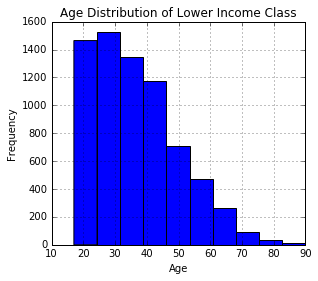

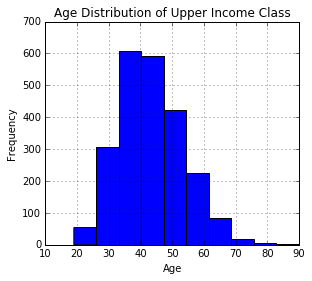

In [73]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Age Distribution of Lower Income Class")
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
lower_income.age.plot(kind='hist', grid=True)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Age Distribution of Upper Income Class")
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
higher_income.age.plot(kind='hist', grid=True)

As shown above, for the lower income class, most of people are between 15 and 45 years. For the upper income class, most of people are between 30 and 50 years old. The distribution of age for the lower income class is skewed to the right while the distribution of age for the upper income class is almost normally distributed.

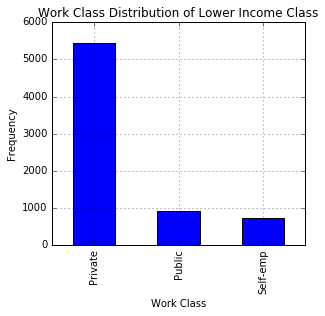

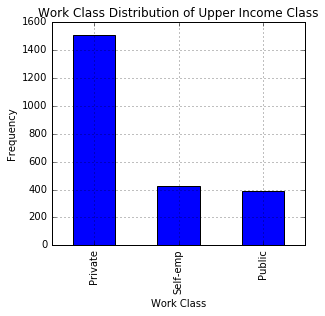

In [74]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Work Class Distribution of Lower Income Class")
ax1.set_xlabel('Work Class')
ax1.set_ylabel('Frequency')
lower_income.workclass.value_counts().plot(kind='bar', grid=True)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Work Class Distribution of Upper Income Class")
ax1.set_xlabel('Work Class')
ax1.set_ylabel('Frequency')
higher_income.workclass.value_counts().plot(kind='bar', grid=True)

As shown above, private working class dominates in both income classes. Public working class is the second most popular value for the lower income class and the third most popular value for the upper income class. 

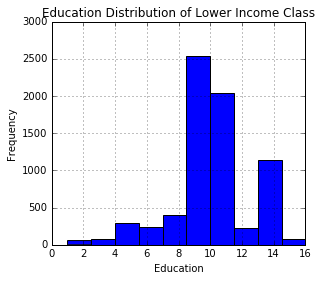

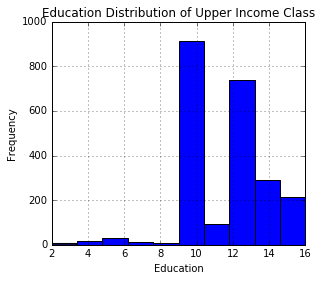

In [75]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Education Distribution of Lower Income Class")
ax1.set_xlabel('Education')
ax1.set_ylabel('Frequency')
lower_income.education.plot(kind='hist', grid=True)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Education Distribution of Upper Income Class")
ax1.set_xlabel('Education')
ax1.set_ylabel('Frequency')
higher_income.education.plot(kind='hist', grid=True)

As shown above, in general, people in the upper income class have more years of education than those in the lower income class. For the lower income class, most of people have years of education between 8 and 12 years. For the upper income class, most of people have years of education around 9 and 10 years. The proportion of people having 12 more years of education in the upper income class outnumbered that in the lower income class.

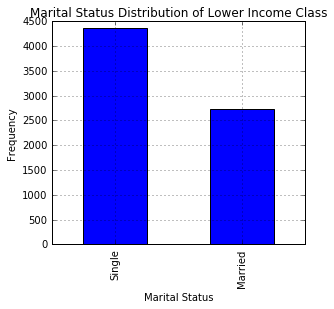

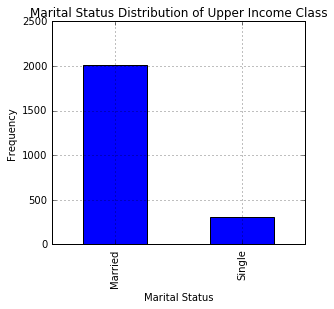

In [76]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Marital Status Distribution of Lower Income Class")
ax1.set_xlabel('Marital Status')
ax1.set_ylabel('Frequency')
lower_income["marital-status"].value_counts().plot(kind='bar', grid=True)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Marital Status Distribution of Upper Income Class")
ax1.set_xlabel('Marital Status')
ax1.set_ylabel('Frequency')
higher_income["marital-status"].value_counts().plot(kind='bar', grid=True)

As shown above, most of people in the lower income class are single while most of people in the upper income class are married.

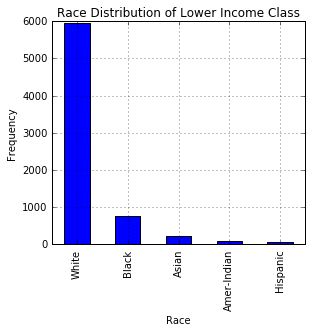

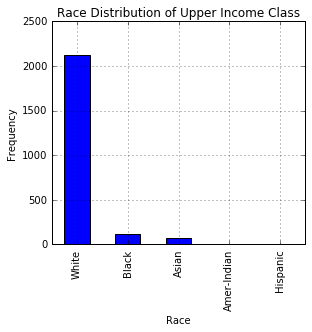

In [77]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Race Distribution of Lower Income Class")
ax1.set_xlabel('Race')
ax1.set_ylabel('Frequency')
lower_income.race.value_counts().plot(kind='bar', grid=True)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Race Distribution of Upper Income Class")
ax1.set_xlabel('Race')
ax1.set_ylabel('Frequency')
higher_income.race.value_counts().plot(kind='bar', grid=True)

Overall, for both income class, White is the most popular race, followed by Black as the second, Asian as the third, American Indian as the fourth and Hispanic as the fifth. 

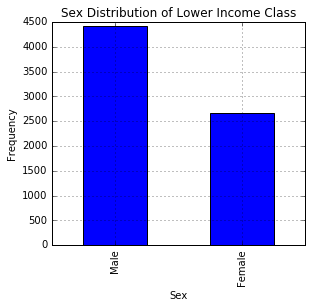

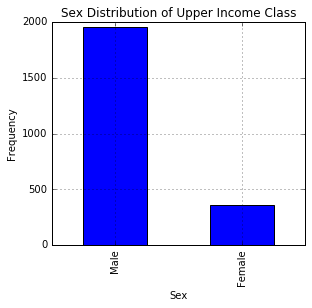

In [78]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Sex Distribution of Lower Income Class")
ax1.set_xlabel('Sex')
ax1.set_ylabel('Frequency')
lower_income.sex.value_counts().plot(kind='bar', grid=True)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Sex Distribution of Upper Income Class")
ax1.set_xlabel('Sex')
ax1.set_ylabel('Frequency')
higher_income.sex.value_counts().plot(kind='bar', grid=True)

As shown above, for both income classes, most of the people are male.

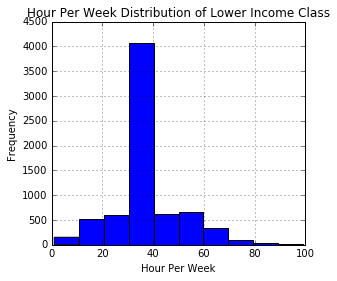

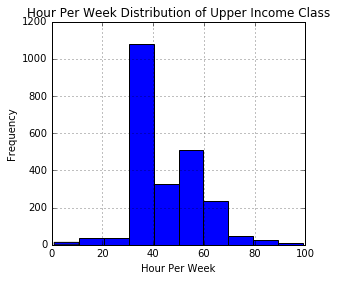

In [79]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Hour Per Week Distribution of Lower Income Class")
ax1.set_xlabel('Hour Per Week')
ax1.set_ylabel('Frequency')
lower_income['hours-per-week'].plot(kind='hist', grid=True)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Hour Per Week Distribution of Upper Income Class")
ax1.set_xlabel('Hour Per Week')
ax1.set_ylabel('Frequency')
higher_income['hours-per-week'].plot(kind='hist', grid=True)

As shown above, in the lower income class, most of the people work between 10 and 60 hours per week with the mode being between 30 and 40 hours. For the upper income class, most of the people work between 30 and 70 hours per week with the mode being between 30 and 40 hours.

In general, people in the upper income class are generally older and have more education than those in the lower income class. In addition, people in the upper income class are mostly married in comparison to that people in the lower income class are mostly single. In general, people in the upper income class work more hours per week than those in the lower income class.

##### b) Predictive Modeling and Model Evaluation:
##### -Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then separate the target attribute ("income_>50K") from the attributes used for training. [Note: you need to drop "income_<=50K" which is also created as a dummy variable in earlier steps).
##### -Use scikit-learn to build classifiers uisng Naive Bayes (Gaussian), decision tree (using "entropy" as selection criteria), and linear discriminant analysis (LDA). For each of these perform 10-fold cross-validation (using cross-validation module in scikit-learn) and report the overall average accuracy.
##### [Extra Credit] For the decision tree model (generated on the full training data), generate a visualization of tree and submit it as a separate file (png, jpg, or pdf).

In [80]:
cs_dat = pd.get_dummies(cs_dat)
cs_dat = cs_dat.drop('income_<=50K', axis=1)
labels = np.array(cs_dat['income_>50K'])
cs_dat = cs_dat.drop('income_>50K', axis=1)
col_features = cs_dat.columns

In [81]:
cs_dat.head(5)

age  education  hours-per-week  workclass_Private  workclass_Public  \
0   39         13              40                  0                 1   
1   50         13              13                  0                 0   
2   38          9              40                  1                 0   
3   53          7              40                  1                 0   
4   28         13              40                  1                 0   

   workclass_Self-emp  marital-status_Married  marital-status_Single  \
0                   0                       0                      1   
1                   1                       1                      0   
2                   0                       0                      1   
3                   0                       1                      0   
4                   0                       1                      0   

   race_Amer-Indian  race_Asian  race_Black  race_Hispanic  race_White  \
0                 0           0           0              0           1   
1                 0           0           0              0           1   
2                 0           0           0              0           1   
3                 0           0           1              0           0   
4                 0           0           1              0           0   

   sex_Female  sex_Male  
0           0         1  
1           0         1  
2           0         1  
3           0         1  
4           1         0

In [82]:
cs_dat = np.array(cs_dat)
cs_dat

array([[ 39.        ,  13.        ,  40.        , ...,   1.        ,
          0.        ,   1.        ],
       [ 50.        ,  13.        ,  13.        , ...,   1.        ,
          0.        ,   1.        ],
       [ 38.        ,   9.        ,  40.        , ...,   1.        ,
          0.        ,   1.        ],
       ..., 
       [ 21.        ,  10.        ,  40.        , ...,   0.        ,
          0.        ,   1.        ],
       [ 38.44980616,   2.        ,  53.        , ...,   1.        ,
          0.        ,   1.        ],
       [ 39.        ,  10.        ,  40.        , ...,   1.        ,
          1.        ,   0.        ]])

Naive Bayes

In [83]:
from sklearn import cross_validation

In [84]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(cs_dat, labels)
nb_cv_scores = cross_validation.cross_val_score(nbclf, cs_dat, labels, cv=10)
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (nb_cv_scores.mean(), nb_cv_scores.std() * 2))

Overall Accuracy: 0.72 (+/- 0.02)


Deicison Tree

In [85]:
treelf = tree.DecisionTreeClassifier(criterion="entropy")
treeclf = treeclf.fit(cs_dat, labels)
tree_cv_scores = cross_validation.cross_val_score(treeclf, cs_dat, labels, cv=10)
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (tree_cv_scores.mean(), tree_cv_scores.std() * 2))

Overall Accuracy: 0.77 (+/- 0.02)


Linear Discriminant Analysis

In [86]:
from sklearn.lda import LDA

/Users/TaihuaLi/anaconda/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [87]:
ldclf = LDA()
ldclf = ldclf.fit(cs_dat, labels)
ld_cv_scores = cross_validation.cross_val_score(ldclf, cs_dat, labels, cv=10)
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (ld_cv_scores.mean(), ld_cv_scores.std() * 2))

Overall Accuracy: 0.81 (+/- 0.02)


/Users/TaihuaLi/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Overall, Linear Discriminant Analysis will be the best approach for this dataset among these three algorithms because it has the highest accuracy. 

#### Extra Credit

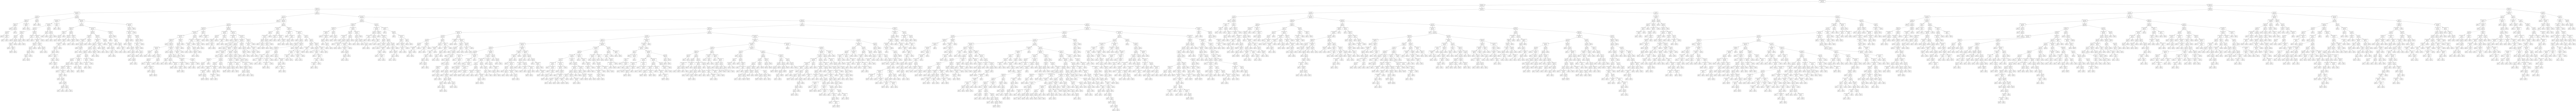

In [88]:
from sklearn import tree
from StringIO import StringIO
t_col = ["age","education","hours-per-week","workclass_Private","workclass_Public","workclass_Self-emp",
         "marital-status_Married", "marital-status_Single", "race_Amer-Indian", "race_Asian", "race_Black", 
         "race_Hispanic", "race_White", "sex_Female", "sex_Male", "income_>50K"]
tree.export_graphviz(treeclf, out_file='tree.dot', feature_names=t_col)
from os import system
system('dot -Tpng tree.dot -o tree1.png')
from IPython.display import Image
Image(filename='tree1.png')